# Exploratory Data Analysis (EDA)-Comcast Telecom Consumer Complaints 
## Introduction

Comcast is the largest American global telecommunication conglomerate. In October 2016, they received a fine of $2.3 million from the  Federal Communications Commissions (FCC) after customers filed more than 2000 complaints between April, 2016 and June, 2016. The fine was purportedly the largest civil penalty imposed on a cable operator. The FCC claimed they fined Comcast for wrongfully charging customers, but Comcast refuted this claim. The company's database serves as a repository of public customer complaints filed against Comcast. I will analyze the relevant data to pin down Comcast's customer service flaws, how the organization could improve, and if they received a significant number of billing- related complaints.

## Data Dictionary

#### Ticket #: Ticket number assigned to each complaint
#### Customer Complaint: Description of complaint
#### Date: Date of complaint
#### Time: Time of complaint
#### Received Via: Mode of communication of the complaint
#### City: Customer city
#### State: Customer state
#### Zipcode: Customer zip
#### Status: Status of complaint
#### Filing on behalf of someone: If the complaint was filed on behalf of someone or not

## Objective

The aim of this analysis is to identify areas in customer service Comcast could focus on improving  to reduce the likelihood of future penalization. To achieve this, I will be performing the following EDA steps on the dataset:

- Plot a trend chart that depicts the number of complaints at monthly and daily granularity levels. This trend chart will help us determine the days and months with the highest number of complaints. 
- Construct a table containing each complaint type's frequency. This table will help us determine the most frequent complaint types.
- Create a new categorical variable with its values as Open and Closed. Open & Pending complaint status will be categorized as Open and Closed, and Solved will be tagged as Closed. This new variable will be used to plot a stacked bar chart that depicts the status of complaints in each state; thus to visually representing how adept each state is at resolving consumer complaints in the bar chart. 
- Perform a calculation to determine the states with the most complaints and the highest percentage of unresolved complaints
- Perform a calculation to determine the percentage of resolved complaints that were received through the Internet and those that were received through customer care calls.




## Importing Relevant Libraries 

In [1]:
#importing libraries for data wrangling and calculation
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
#from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

## Importing, Reading, and Exploring the Dataset

### Observations
- No null values.
- There are 2224 observations in the dataset; that is, customers filed 2224 complaints during the period under review.

In [2]:
# importing and reading the dataset
df=pd.read_csv('/Users/Abdul/Desktop/datasets/Comcast_telecom_complaints_data.csv', parse_dates=['Date'])
df.sample(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
471,221714,billing,2015-04-07,04-Jul-15,1:34:48 PM,Customer Care Call,Columbiana,Ohio,44408,Closed,No
1087,350930,Comcast,2015-06-19,19-Jun-15,1:36:03 AM,Customer Care Call,Lake Station,Indiana,46405,Solved,No
229,358822,Comcast Issues,2015-06-23,23-Jun-15,3:05:04 PM,Internet,Bloomingdale,Georgia,31302,Pending,No
1615,253872,Comcast Billing Complaint,2015-04-23,23-Apr-15,5:53:14 PM,Internet,Portland,Oregon,97203,Closed,Yes
534,288196,xfinitty tv and exfinity alarm,2015-05-13,13-May-15,4:00:37 PM,Internet,Davie,Florida,33314,Solved,No


In [3]:
#checking for null values
df.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [4]:
# checking for number of columns and observations
df.shape

(2224, 11)

## Trend Chart for the number of Complaint at Monthly Granularity Level
### Observation
- The firm received its highest number of complaints in June


In [5]:
#importng the datetime library to separate the date into year, month, and day. 
#This is needed to plot the trend chart at monthly and daily granularity levels
import datetime
#isolating the year from the date and assigning it into a new variable, YYYY
df['YYYY'] = df['Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y'))
#isolating the month from the date and assigning it into a new variable, MM
df['MM']   = df['Date'].apply(lambda x: datetime.datetime.strftime(x, '%m'))
#isolating the day from the date and assigning it into a new variable, DD
df['DD']   = df['Date'].apply(lambda x: datetime.datetime.strftime(x, '%d'))

In [6]:
# viewing the new dataframe with the three newly created variables
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,YYYY,MM,DD
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015,04,22
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015,04,08
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015,04,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015,05,07
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015,05,26


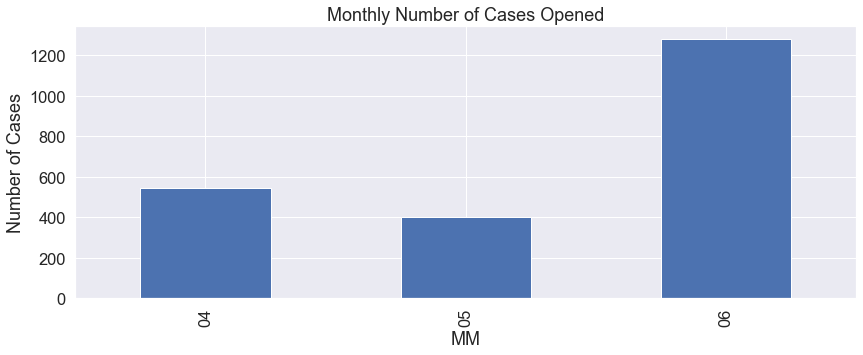

In [7]:
#plotting the trend chart 
df.groupby('MM').size().plot.bar(figsize=(14,5), ylabel='Number of Cases', title='Monthly Number of Cases Opened');

## Trend Chart for the number of Complaints at Daily Granularity Level
### Observation
- A significant portion of the complaints was recieved around the 25th of June. 
- This spike may be as a result of certain events that might have occured around that time; therefore, it should be investigated.

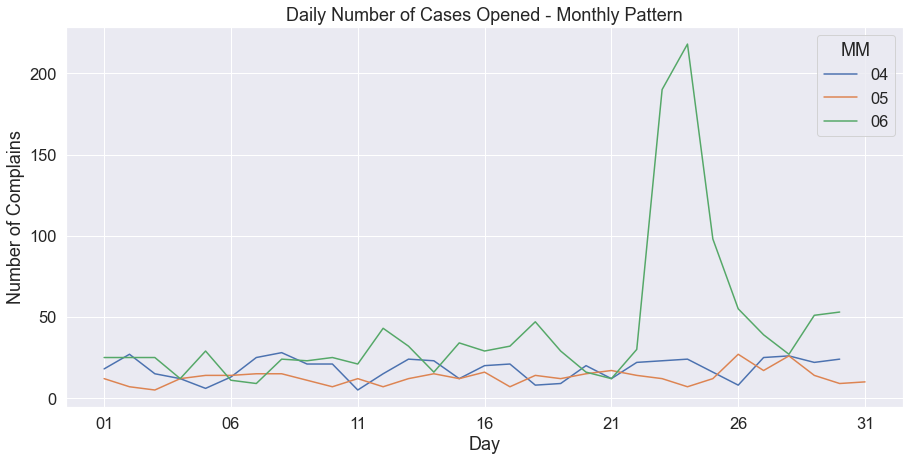

In [8]:
#plotting the trend chart 
df.groupby(['DD','MM']).size().unstack().plot(figsize=(15,7),xlabel='Day',ylabel='Number of Complains', title='Daily Number of Cases Opened - Monthly Pattern');



## A Table Displaying the Frequency of Complaint Types
### Observations
- Complaints unrelated to internet, billing, and speed account for over 50% of the total complaints.
- Internet-related complaints were also exceedingly frequent.
- Comcast received about 300 billing-related complaints. 
- Billing-related complaints account for about 13% of the total complaints.

In [9]:
#viewing the description of complaints 
df['Customer Complaint']

0                           Comcast Cable Internet Speeds
1            Payment disappear - service got disconnected
2                                       Speed and Service
3       Comcast Imposed a New Usage Cap of 300GB that ...
4              Comcast not working and no service to boot
                              ...                        
2219                                 Service Availability
2220           Comcast Monthly Billing for Returned Modem
2221                              complaint about comcast
2222               Extremely unsatisfied Comcast customer
2223                 Comcast, Ypsilanti MI Internet Speed
Name: Customer Complaint, Length: 2224, dtype: object

In [10]:
import re
#defining a function to group complaint types that are not internet, billing, or speed related as others
def create_c_types(c_descp):

    r = re.compile(r'\bBILLING\b | \bINTERNET\b | \bSPEED\b', flags=re.I | re.X)

    ret = r.findall(c_descp)
    
    if not ret:
        ret = ['OTHERS']
        
    return ret

In [11]:
#Applying the function defined above to the  custumor complaint column 
df['New_complaint_type'] = df['Customer Complaint'].apply(create_c_types)

In [12]:
# confirming the new complaint type column
df['New_complaint_type'].sample(25)

1507      [OTHERS]
1631      [OTHERS]
55        [OTHERS]
811       [OTHERS]
2023      [OTHERS]
42      [internet]
1986      [OTHERS]
1742    [Internet]
1796      [OTHERS]
1708    [Internet]
2199      [OTHERS]
592       [OTHERS]
1931    [Internet]
1722     [Billing]
1830    [internet]
1649      [OTHERS]
804       [OTHERS]
1472      [OTHERS]
414     [Internet]
269       [OTHERS]
2187      [OTHERS]
675       [OTHERS]
1697    [Internet]
1975     [Billing]
314       [OTHERS]
Name: New_complaint_type, dtype: object

In [13]:
#checking the frequency of each complaint type
df['New_complaint_type'].value_counts()

[OTHERS]                       1385
[Internet]                      260
[internet]                      160
[Billing]                       142
[billing]                       108
[speed]                          27
[Internet, Speed]                23
[Internet, speed]                20
[Speed]                          19
[Internet, Billing]              17
[internet, speed]                11
[speed, internet]                 8
[INTERNET]                        7
[internet, billing]               6
[BILLING]                         5
[billing, internet]               3
[internet, internet]              3
[Speed, Internet]                 3
[speed, billing]                  2
[Speed, internet]                 2
[billing, speed]                  1
[Speed, speed]                    1
[internet, Billing]               1
[billing, billing]                1
[Billing, Internet]               1
[Billing, internet]               1
[INTERNET, BILLING]               1
[Billing, billing]          

In [14]:
#defining a function to group complaint types into billing and others
def create_comp_types(c_descp):

    r = re.compile(r'\bBILLING\b', flags=re.I | re.X)

    ret = r.findall(c_descp)
    
    if not ret:
        ret = ['OTHERS']
        
    return ret

In [15]:
#applying the function to the customer complaint column and assigning the new compliant types to a new column, comp_type
df['comp_type']=df['Customer Complaint'].apply(create_comp_types)
df['comp_type'].sample(25)

2131     [OTHERS]
655      [OTHERS]
1335     [OTHERS]
428      [OTHERS]
1315     [OTHERS]
304      [OTHERS]
1359     [OTHERS]
750      [OTHERS]
1421     [OTHERS]
903      [OTHERS]
1844     [OTHERS]
980      [OTHERS]
1550     [OTHERS]
2192     [OTHERS]
994     [Billing]
2177     [OTHERS]
1922    [billing]
2013     [OTHERS]
1240     [OTHERS]
1259     [OTHERS]
949      [OTHERS]
2023     [OTHERS]
1689    [Billing]
1362    [Billing]
1098    [Billing]
Name: comp_type, dtype: object

In [16]:
#checking the frequency of billing-related complaints
df['comp_type'].value_counts()

[OTHERS]              1932
[Billing]              163
[billing]              121
[BILLING]                6
[Billing, billing]       1
[billing, billing]       1
Name: comp_type, dtype: int64

# A Stacked Bar Graph Displaying the Status of Complaints in Each State
## Observations
- California, Georgia, Florida, and Tennessee appear to have received the highest numbers of unresolved cases.
- Since these four states received some of the the highest numbers of complaints, it is best to also calculate the percentage of unresolved cases in each state to make an accurate comparison.


In [17]:
#Creating a dictionary to replace the Status Variable with new values. Open & Pending are categorized as Open, and Closed and Solved are categorized as Closed.
updated_status={'Status': {'Closed': 'Closed',
                           'Pending':'Open',
                           'Open': 'Open',
                           'Solved':'Closed'}
            
           }
updated_status

{'Status': {'Closed': 'Closed',
  'Pending': 'Open',
  'Open': 'Open',
  'Solved': 'Closed'}}

In [18]:
#replacing the status variable with the dictionary created above
df.replace(updated_status, inplace=True)

In [19]:
#confirming the the updated values in the status variable 
df['Status'].unique()

array(['Closed', 'Open'], dtype=object)

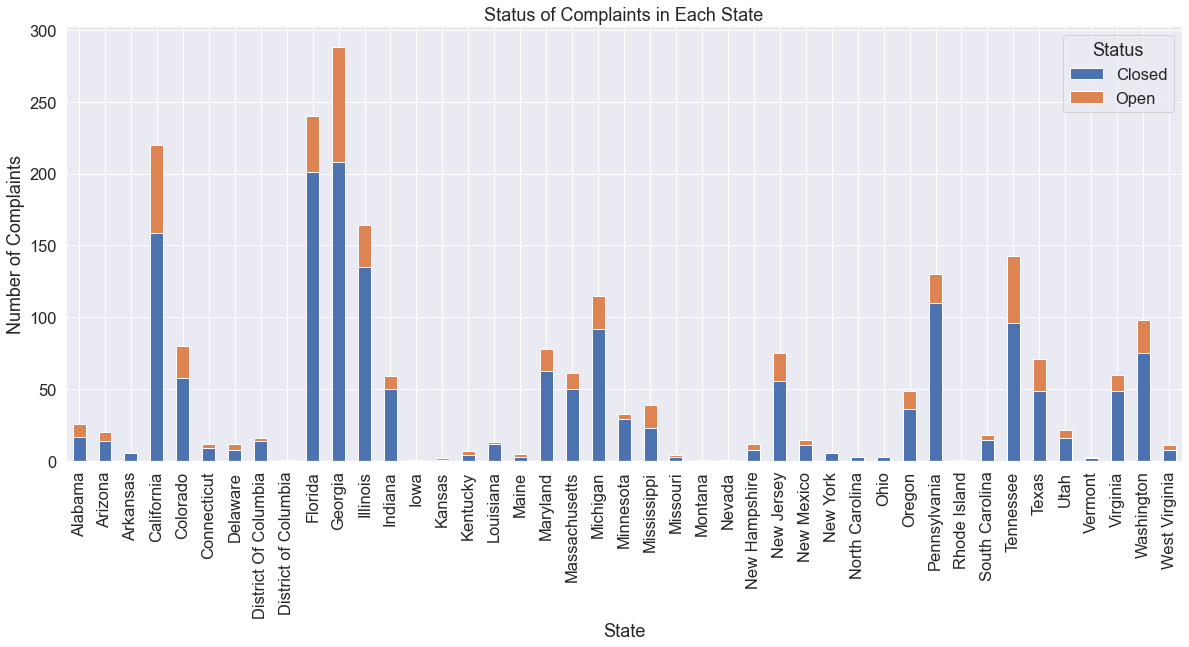

In [20]:
#plotting the stacked bar chart  with the two values
df.groupby(['State','Status']).size().unstack().plot.bar(ylabel='Number of Complaints', title= 'Status of Complaints in Each State', figsize=(20,8),stacked=True);

## States with the Highest Number of Complaints
### Observations
- Georgia was the state with the highest number of complaints.
- Most of the states that appear at the top of the ranking are states with large populations. Therefore, high numbers of complaints coming from these states are expected.
- Georgia’s population is small compared to California or Florida, yet more complaints come from Georgia than those states.


In [21]:
df['State'].value_counts()

Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Delaware                 12
New Hampshire            12
Connecticut              12
West Virginia            11
Kentucky                  7
New York                  6
Arkansas                  6
Maine                     5
Missouri                  4
Ohio                      3
Vermont             

## States with the Highest Number of Unresolved Cases
### Observation
- Georgia was the state with the highest number of unresolved cases. This is expected considering the state's high number of complaints 

In [22]:
# Filtering the Original Dataframe for Unresolved Cases 
df['unresolved'] = df['Status'].apply(lambda x: x == 'Open' or x== 'Pending')

In [23]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,YYYY,MM,DD,New_complaint_type,comp_type,unresolved
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015,04,22,[Internet],[OTHERS],False
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015,04,08,[OTHERS],[OTHERS],False
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015,04,18,[Speed],[OTHERS],False
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015,05,07,[OTHERS],[OTHERS],True
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Closed,No,2015,05,26,[OTHERS],[OTHERS],False


In [24]:
#filtering to only rows where cases are still unresolved
df_unresolved = df[df['unresolved'] == True] 

In [25]:
# calculating the number of unresolved cases for each state
df_unresolved['State'].value_counts() # count the number of rows for each state

Georgia                 80
California              61
Tennessee               47
Florida                 39
Illinois                29
Michigan                23
Washington              23
Texas                   22
Colorado                22
Pennsylvania            20
New Jersey              19
Mississippi             16
Maryland                15
Oregon                  13
Massachusetts           11
Virginia                11
Indiana                  9
Alabama                  9
Arizona                  6
Utah                     6
New Hampshire            4
Delaware                 4
Minnesota                4
New Mexico               4
Connecticut              3
West Virginia            3
South Carolina           3
Kentucky                 3
Maine                    2
District Of Columbia     2
Missouri                 1
Vermont                  1
Kansas                   1
Louisiana                1
Name: State, dtype: int64

## Percentage of Unresolved Cases for Each State
### Observations
- Kansas, Kentucky, Mississippi, Maine, and Alabama were the five states with the highest proportion of unresolved cases.

In [26]:
# checking the numbers of resolved and unresolved cases for each state. True indicates unresolved and false indicates resolved.
df.groupby(['State','unresolved']).size().unstack()

unresolved,False,True
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


In [27]:
# creating a new dataFrame that shows the number of resolved cases and unresolved cases for each state
status_by_state = df.groupby(['State','unresolved']).size().unstack().reset_index()
# filling NA with zeros because NA means zero in this case
status_by_state.fillna(0,inplace=True)
status_by_state[:5]

unresolved,State,False,True
0,Alabama,17.0,9.0
1,Arizona,14.0,6.0
2,Arkansas,6.0,0.0
3,California,159.0,61.0
4,Colorado,58.0,22.0


In [28]:
# creating another column named case_count to show the sum of resolved cases for each state
status_by_state['case_count'] = (status_by_state[False] + status_by_state[True])
status_by_state[:5]

unresolved,State,False,True,case_count
0,Alabama,17.0,9.0,26.0
1,Arizona,14.0,6.0,20.0
2,Arkansas,6.0,0.0,6.0
3,California,159.0,61.0,220.0
4,Colorado,58.0,22.0,80.0


In [29]:
# calculating the proportion of unresolved cases for each state and assigning the resulting values to a new column named proportion_unresolved
status_by_state['proportion_unresovled'] = status_by_state[True] / status_by_state['case_count']
#sorting the values to see the states with the highest proportion of unresolved cases
status_by_state.sort_values(['proportion_unresovled'], ascending=False).head()

unresolved,State,False,True,case_count,proportion_unresovled
14,Kansas,1.0,1.0,2.0,0.500000
15,Kentucky,4.0,3.0,7.0,0.428571
22,Mississippi,23.0,16.0,39.0,0.410256
17,Maine,3.0,2.0,5.0,0.400000
0,Alabama,17.0,9.0,26.0,0.346154


## The Percentage of Resolved Complaints Received Through the Internet and Customer Care Calls
### Observations
- 77% of Complaints received via Customer Care Call were resolved.
- 76% of complaints recieved via the internet were resolved.
- The means by which customers lodged thier complaints did not affect the likelihood of thier compliants being resolved.

In [30]:
# creating a new dataFrame that shows the number of resolved cases and unresolved cases for each mode of complaints(customer care calls and internet)
resolved_by_complaint_source=df.groupby(['Received Via', 'Status']).size().unstack().reset_index()
df['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [31]:
resolved_by_complaint_source.head()

Status,Received Via,Closed,Open
0,Customer Care Call,864,255
1,Internet,843,262


In [32]:
# creating another column named case_count to show the sum of resolved cases for both customer care call complaints and internet complaints
resolved_by_complaint_source['case_count'] = (resolved_by_complaint_source['Closed'] + resolved_by_complaint_source['Open'])
resolved_by_complaint_source[:5]

Status,Received Via,Closed,Open,case_count
0,Customer Care Call,864,255,1119
1,Internet,843,262,1105


In [33]:
# calculating the proportion of unresolved cases for both customer care call complaints and internet complaints and assigning the resulting values to a new column named proportion_unresolved
resolved_by_complaint_source['proportion_resovled'] = resolved_by_complaint_source['Closed'] / resolved_by_complaint_source['case_count']
resolved_by_complaint_source.sort_values(['proportion_resovled'], ascending=False).head()

Status,Received Via,Closed,Open,case_count,proportion_resovled
0,Customer Care Call,864,255,1119,0.772118
1,Internet,843,262,1105,0.762896


## Conclusion
Comcast received 2224 complaints between April 2016 and June 2016, after which the FCC penalized them for wrongfully charging customers. After analyzing the organization's consumer complaints data for the stipulated period, I discerned that Comcast's overall service was below-par, as the organization received many billing-related and other complaints. Also, they received more than half of the total complaints in June, with a sudden spike on the 25th of June. Further, the organization received many complaints from high-population states such as California, Georgia, and Florida. Lastly, some states, such as Kansas, Kentucky, Mississippi, Maine, and Alabama, have many unresolved cases.

## Recommendations
- Since there was an abrupt increase in the number of complaints around the 25th of June, the organization should investigate any unusual occurrences that might have occurred around that time.
- The organization’s primary efforts for improvement should go toward Georgia, given its high ratio of unresolved complaints to population.
- They should channel more resources towards resolving the open cases in Kansas, Kentucky, Mississippi, Maine, and Alabama, given the high proportion of unresolved issues in these states.
- Additionally, They should channel more resources to resolving open cases in high-population states such as California, Georgia, Florida, and Tennessee, as these states are bound to receive more complaints than other states.
- Also, they should revamp their accounting department to ensure customers do not incur unwarranted charges.
- Lastly, They should prioritize overall improvement to reduce the overall number of consumer complaints. 
